# GeoMaps, the example python notebook

If you want to run the GeoMaps functions that plot dutch postalcode areas that use polygons (so all functions except .scatter), you will need to have a file that has the shapes of the polygons. 
The shape of this file should be of the form: 

[[X,Y,GEMCODE,GEMNAAM,GEMNR,INW_T,NETNUMMER,PC1CODE,PC2CODE,PC3CODE,PC4CODE,
PC4NAAM,PC4NR,PROVAFK,PROVC,PROVC_NM,WOONPLAATS,WNPCODE,WNPNAAM,XCOORD,YCOORD]].

A file like this can be bought at Dutch Geo Information Companies, one example of such is GeoDan.

For the **world map**, the data is open source, so it is included.

In [1]:
try:
    import geomaps
except ImportError:
    print "Probably you didn't install KaveToolbox correctly, it's not on your path, but anyway I will try and find the module"
    import sys
    sys.path.append("../python")
    import geomaps

# Pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

help(geomaps)

Help on package geomaps:

NAME
    geomaps

FILE
    /opt/KaveToolbox/pro/python/geomaps/__init__.py

DESCRIPTION
    A simple library with plotting functions to display on a postal-code map
    US map or world map.
    Required packages are: Pandas, Numpy, Matplotlib

PACKAGE CONTENTS


FUNCTIONS
    US_map(states, values, location=['all'], **kwargs)
        Give the function a dataframe that contains the state
        codes US states, such as 'FL', 'CA' and the values.
        The states is the column containing the statecodes.
        The column with values will automatically be plotted.
        
        Parameters
        ----
        kwargs:
        
        location: give a list of states and the plot will
        automatically be cut to this area. The states have
        to be in US shorthand notation, eg. NC = North
        Carolina.
        
        title: (string) give a title for the plot, if location
        is on, it will automatically be added to the title.
        
     

# CBS income for postcodes

In [2]:
#here we load the supplied public data to make the example plots, anything with a value per postcode will work
# we merge/average into postal 4-code for prettier plotting
cbs_inkomens_raw = pd.read_csv('./CBS_inkomensgegevens_2009.csv', sep=',')
del cbs_inkomens_raw['Unnamed: 0']
cbs_inkomens = cbs_inkomens_raw.copy()
cbs_inkomens['postcode4'] = cbs_inkomens['pc6'].apply(lambda x: x[:4])
cbs_inkomens = cbs_inkomens[~cbs_inkomens.Fiscaalmaandinkomen.str.contains('x')]
cbs_inkomens = cbs_inkomens[['postcode4','Inkomensontvangers','Fiscaalmaandinkomen']].astype(int)
cbs_inkomens = cbs_inkomens.groupby('postcode4').agg('mean').reset_index()

# First: need to group postal data into postal 4-codes for better plotting

In [3]:
postcodes = pd.read_csv(geomaps.postcode_data,sep=',')

In [4]:
postcodes = postcodes[['pnum','lat','lon','rd_x','rd_y']]

In [5]:
postcodes_av = postcodes.groupby('pnum').mean().reset_index()
postcodes_av["postcode"]=postcodes_av["pnum"]
postcodes_av.head()

,pnum,lat,lon,rd_x,rd_y,postcode
0,1000,52.377779,4.905590,122205.60000,487876.4950,1000
1,1001,52.377779,4.905590,122205.60000,487876.4950,1001
2,1002,51.861192,4.358999,84174.14459,430792.9086,1002
3,1003,51.861192,4.358999,84174.14459,430792.9086,1003
4,1005,52.377779,4.905590,122205.60000,487876.4950,1005


# Now I can make one of two different plots:

a) geomaps.scatter will make a simple point at the centre of the postcode requested
- it needs two series, postalcodes->values and in case you want to use the group postal data, you must have grouped it first yourself
- it takes all usual arguements which work in plt.scatter

Help on function scatter in module geomaps:

scatter(postcodes, values, **kwargs)
    Extra kwargs will be forwarded to the scatter plot function.
    
    Parameters:
    
    ---
    
    postcodes = series data corresponding to values
    values = the value to plot in a given postcode
    postaldata = a dataframe containing the rd_x rd_y of these postcodes, if none is given then the csv in
    geomaps.postcode_data is read
    square = True, pad the x and y axis to make the plot square
    colorbar = True, add a colorbar, default true.



(5870.5669073742283,
 282374.64807683398,
 278665.63686058822,
 636817.32668882597)

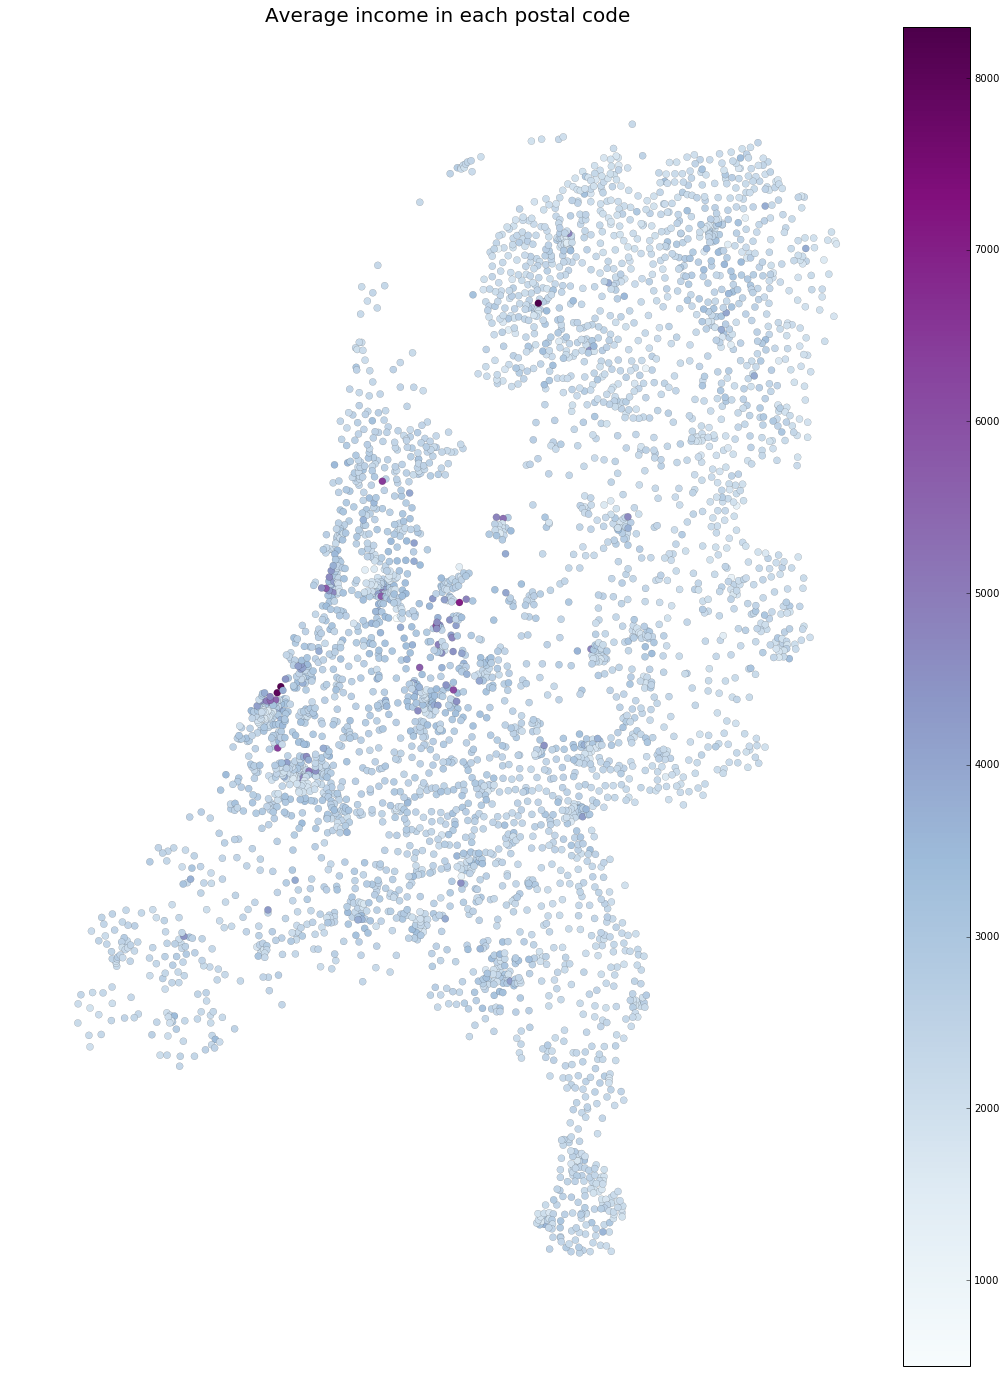

In [6]:
plt.figure(figsize=(18,24))
help(geomaps.scatter)
geomaps.scatter(cbs_inkomens['postcode4'],cbs_inkomens['Fiscaalmaandinkomen'],postaldata=postcodes_av,s=50,linewidth=0.1,cmap='BuPu')
plt.title('Average income in each postal code ', fontsize=20)
plt.axis('off')

b) geomaps.area will make a polygon surrounding the postalcode
- it needs two series, postalcodes->values and in case you want to use the group postal data, you must have grouped it first yourself
- it takes all usual arguements which work in plt.scatter, if you don't specify a cmap, RdYlGn will be used

Now we want to give colors to every postalcode. We use the function color_map and pass a list with postalcodes and a list with colors, which are strings. For example:  
[1011, 'red']

# US Map
A function where you can plot values on a map of the US. The data for the polygons is open source.

In [7]:
df_import = pd.read_csv(geomaps.US_polygons)

In [8]:
dfUS = pd.DataFrame([np.random.uniform(500,900) for x in df_import.StateName.unique()], df_import.StateName.unique(), columns=['vals']).reset_index()
dfUS.rename(columns={'index':'StateName'}, inplace=True)

In [9]:
statelist = ['WV', 'NC', 'DE', 'RI', 'LA', 'IN', 'IA', 'KY', 'MT', 'MN', 'OR', 'ID', 'NH', 'NY', 'TN', 'FL', 'MI',
 'SC', 'VT', 'AZ', 'IL', 'UT', 'TX', 'CT', 'WA', 'WI', 'PR', 'MA', 'AR', 'ND', 'CO', 'WY', 'AL', 'NJ',
 'MD', 'GA', 'NM', 'OK', 'NV', 'DC', 'CA', 'PA', 'VA', 'SD', 'NE', 'MO', 'MS', 'ME', 'OH', 'KS']

In [10]:
dfUS.ix[[0,4,6,7,9]] = np.nan

INFO: Applying selection on location.


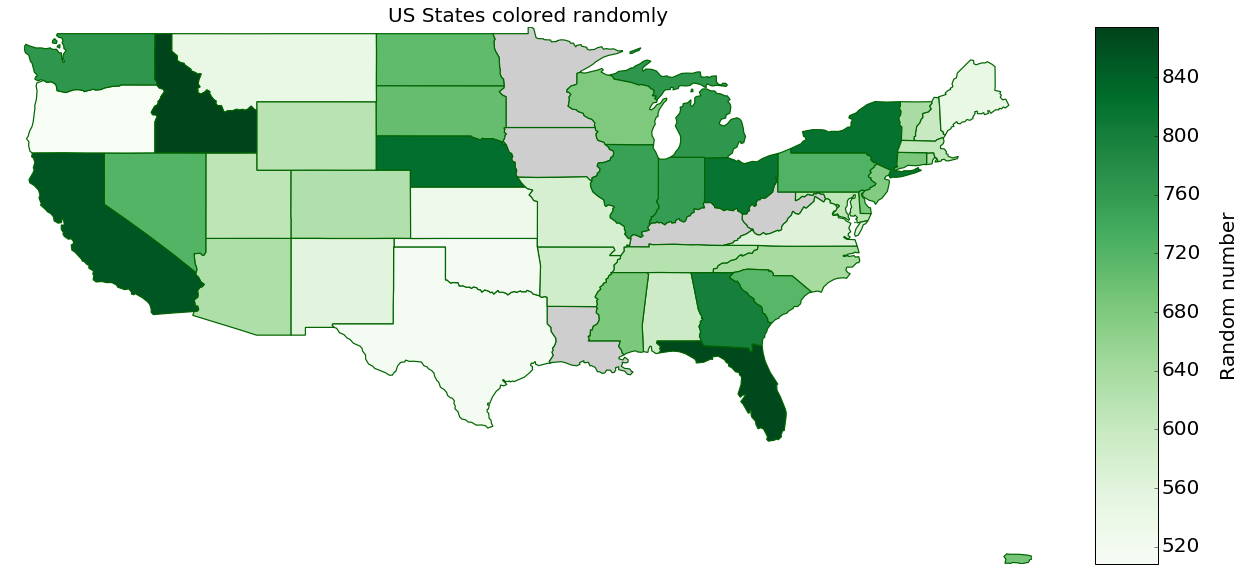

In [11]:
geomaps.US_map(dfUS.StateName, dfUS.vals, color='Greens', sidebar='Random number', title='US States colored randomly', size=14, location=statelist,
                linewidth=1.2, edgecolor='DarkGreen')
plt.show()

In [12]:
dfUS = pd.DataFrame([np.random.randint(1,5) for x in df_import.StateName.unique()], df_import.StateName.unique(), columns=['vals']).reset_index()
dfUS.rename(columns={'index':'StateName'}, inplace=True)

In [13]:
color_dict = {1: 'Blue', 2: 'Red', 3: 'Green', 4: 'Yellow'}

In [14]:
dfUS.vals = dfUS.vals.apply(lambda x: color_dict[x])

In [15]:
dfUS.ix[[0,1,3,4,5,6,7,8]] = np.nan

INFO: Applying selection on location.


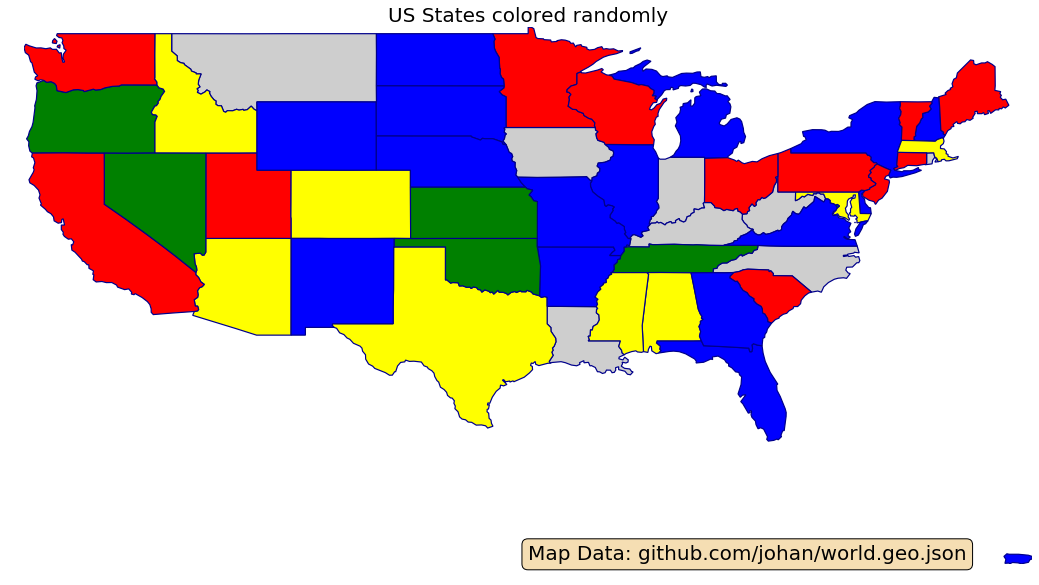

In [16]:
geomaps.US_map(dfUS.StateName, dfUS.vals, color='Greens', sidebar='Random number', title='US States colored randomly', size=14, location=statelist,
                linewidth=1.2, edgecolor='DarkBlue', copyright='r')
plt.show()

# World Map
The worldmap can plot values on a worldmap. The data for the polygons is open source.

In [17]:
worldPoly = pd.read_csv(geomaps.world_polygons)

In [18]:
dfWorld = pd.DataFrame([np.random.uniform(500,1000) for x in worldPoly.code.unique()],worldPoly['code'].unique(), columns=['val']).reset_index()
dfWorld.rename(columns={'index':'code'}, inplace=True)

Help on function world_map in module geomaps:

world_map(countries, values, location=['all'], **kwargs)
    Give the function a dataframe that contains the codes
    of country names and the values.
    The merge_col is the column containing the postalcodes.
    The column with values will automatically then be
    plotted.
    
    Parameters
    ----
    kwargs:
    
    location: give a list of countries or continents (but
    not combinations!) and the plot will
    automatically be cut to this area. The countries have
    to be in the international shorthand notation, eg.
    SWE = Sweden.
    
    title: (string) give a title for the plot, if location
    is on, it will automatically be added to the title.
    
    sidebar: give the title of the colorbar on the side.
    
    linewidth: the linewidth of the polygon edges.
    
    color: the color of the polygon faces.
    
    edgecolor: the color of the polygon edges.
    
    size: (int) the figsize of the plot. Aspect ratio i

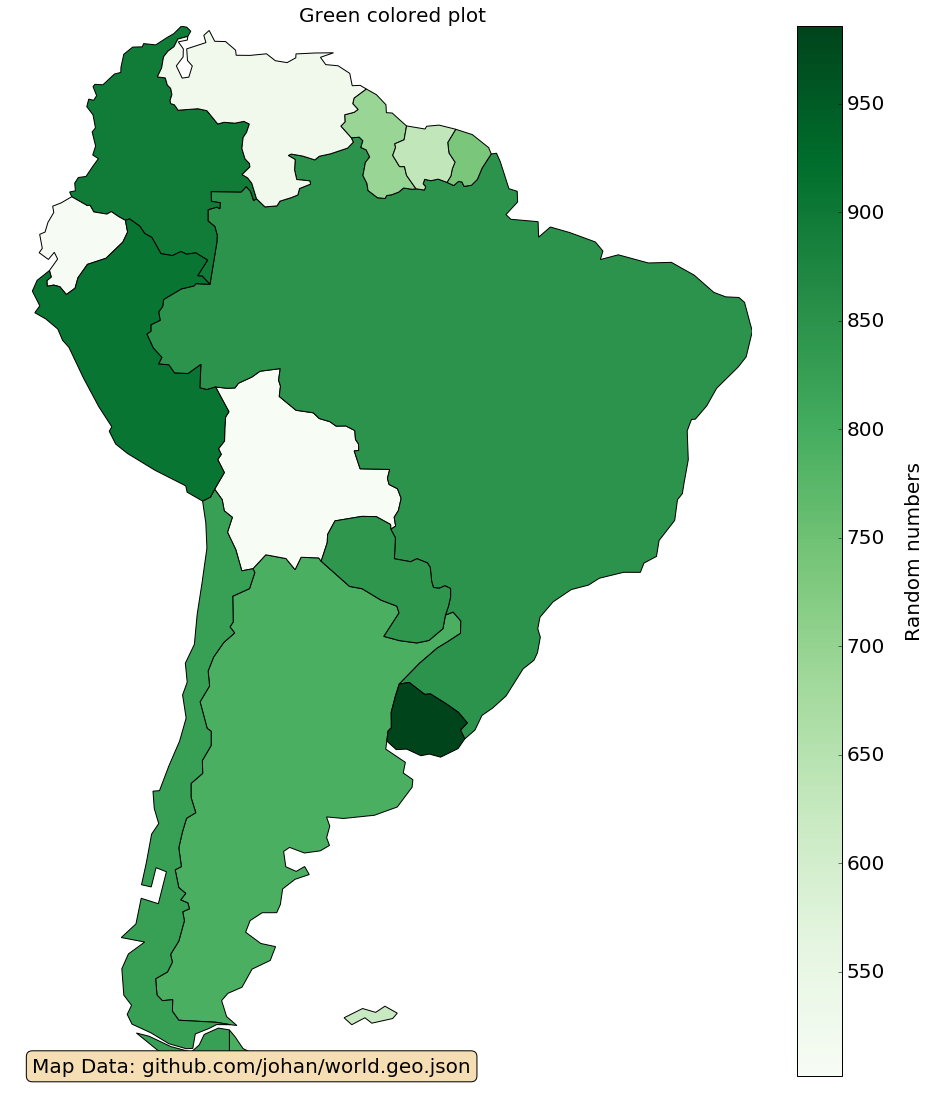

In [19]:
help(geomaps.world_map)
reload(geomaps)
geomaps.world_map(dfWorld.code, dfWorld.val, size=10, color='Greens', title='Green colored plot', sidebar='Random numbers', location=['south america'],
                  linewidth = 1, edgecolor='Black', copyright='l')

In [20]:
%load_ext watermark
%watermark -a KAVE -d -t -v -p numpy,pandas -g

KAVE 2016-09-01 17:16:35 

CPython 2.7.12
IPython 4.0.1

numpy 1.10.1
pandas 0.17.1
Git hash: e682a8ce36d019fff0ee6067182136550a222d07
